In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from test_notebook import compute_vals, visualize_fav_season, visualize_big_fear

In [13]:
data = pd.read_csv(r"C:\Users\MY PC\Data-Science-Club\Getting_started\intro_data.csv")

In [14]:
cols = list(data.columns)
cols

['What is your name?',
 'What is your gender?  ',
 'What year are you in college?  ',
 'What is your major or field of study?  ',
 'What is your age group?  ',
 'Are you an international student?  ',
 'Column 7',
 'Column 8',
 'Column 9',
 'Column 10',
 'Column 11',
 'Column 12',
 'Column 13',
 'Column 14']

In [15]:
cols = list(data.columns)
rename_cols = ["name", "gender", "uni_year", "major", "age_group", "intl_or_not", "card_team","big_college_fear", 
			   "fav_food", "fav_season", "fav_past_time", "sleep_hour", "roadtrip_vs_vacation", 
			   "times_asleep_inclass"]
rename_dict = {}

for i in range(len(cols)):
	rename_dict[cols[i]] = rename_cols[i]

rename_dict

{'What is your name?': 'name',
 'What is your gender?  ': 'gender',
 'What year are you in college?  ': 'uni_year',
 'What is your major or field of study?  ': 'major',
 'What is your age group?  ': 'age_group',
 'Are you an international student?  ': 'intl_or_not',
 'Column 7': 'card_team',
 'Column 8': 'big_college_fear',
 'Column 9': 'fav_food',
 'Column 10': 'fav_season',
 'Column 11': 'fav_past_time',
 'Column 12': 'sleep_hour',
 'Column 13': 'roadtrip_vs_vacation',
 'Column 14': 'times_asleep_inclass'}

In [16]:
data.rename(columns=rename_dict, inplace=True)

In [17]:
data.head()

,name,gender,uni_year,major,age_group,intl_or_not,card_team,big_college_fear,fav_food,fav_season,fav_past_time,sleep_hour,roadtrip_vs_vacation,times_asleep_inclass
0,a,Female,Sophomore,e,21-23,Yes,Diamonds,Finding a job/intern,Chocolate,Fall,Hanging out with friends,1,Plan a month-long vacation,1
1,b,Male,Sophomore,cs,18-20,Yes,Diamonds,Group projects,Ramen,Fall,Hanging out with friends,8,Plan a month-long vacation,2
2,c,Female,Sophomore,4,18-20,Yes,Hearts,Public speaking,Pizza,Fall,Scrolling social media,4,Spontaneous road trip,4
3,a,Female,Freshman,c,Under 18,Yes,Hearts,Finding a job/intern,Mac and cheese,Winter,Playing video games,8,Plan a month-long vacation,0
4,b,Male,Sophomore,w,21-23,Yes,Clubs,Failing a class,Chocolate,Summer,Hanging out with friends,5,Spontaneous road trip,1


## 1. Analyze data and compute necessary values

In [18]:
data.describe()

,sleep_hour,times_asleep_inclass
count,20.000000,20.000000
mean,6.400000,2.200000
std,2.348572,2.783409
min,1.000000,0.000000
25%,5.000000,0.000000
50%,7.000000,1.000000
75%,8.000000,4.000000
max,9.000000,8.000000


In [19]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   name                  20 non-null     object
 1   gender                20 non-null     object
 2   uni_year              20 non-null     object
 3   major                 20 non-null     object
 4   age_group             20 non-null     object
 5   intl_or_not           20 non-null     object
 6   card_team             20 non-null     object
 7   big_college_fear      20 non-null     object
 8   fav_food              20 non-null     object
 9   fav_season            20 non-null     object
 10  fav_past_time         20 non-null     object
 11  sleep_hour            20 non-null     int64 
 12  roadtrip_vs_vacation  20 non-null     object
 13  times_asleep_inclass  20 non-null     int64 
dtypes: int64(2), object(12)
memory usage: 2.3+ KB


In [20]:
# preprocess
# other than 4 categories, replace with "Other"
data["fav_food"] = data["fav_food"].apply(lambda x: x if x in ["Chocolate", "Ramen", "Pizza", "Mac and cheese"] else "Other")

In [21]:
color_list = ["red", "black"]
color_dict = {"Diamonds": "red", "Spades": "black", "Hearts": "red", "Clubs": "black"}
card_list = list(data["card_team"].unique())
# data["card_team"] = data["card_team"].apply(lambda x: color_dict[x])
compute_vals(data, card=color_list, target_col="sleep_hour", team_col="card_team")

The average hours of sleep for team red is 5.6
The minimum hours of sleep for team red is 1
The maximum hours of sleep for team red is 8

The average hours of sleep for team black is 7.2
The minimum hours of sleep for team black is 5
The maximum hours of sleep for team black is 9



In [22]:
# modified data
data.tail()

,name,gender,uni_year,major,age_group,intl_or_not,card_team,big_college_fear,fav_food,fav_season,fav_past_time,sleep_hour,roadtrip_vs_vacation,times_asleep_inclass
15,c,Female,Sophomore,ai,18-20,Yes,red,Finding a job/intern,Chocolate,Summer,Binge-watching a movie/TV series,7,Spontaneous road trip,8
16,a,Male,Freshman,m,24-26,No,black,Group projects,Ramen,Summer,"Binge-reading (novels, comics, etc.)",8,Plan a month-long vacation,6
17,b,Male,Junior,9,21-23,No,black,Group projects,Mac and cheese,Fall,"Binge-reading (novels, comics, etc.)",9,Spontaneous road trip,0
18,c,Male,Sophomore,e,18-20,No,black,Group projects,Other,Winter,Hanging out with friends,7,Spontaneous road trip,0
19,a,Male,Sophomore,e,18-20,No,black,Group projects,Other,Winter,Hanging out with friends,7,Spontaneous road trip,0


## 2. Visualize data

- Bar chart on favorite seasons

In [23]:
color_dict = {"Diamonds": "red", "Spades": "black", "Hearts": "red", "Clubs": "black"}
data.head()

,name,gender,uni_year,major,age_group,intl_or_not,card_team,big_college_fear,fav_food,fav_season,fav_past_time,sleep_hour,roadtrip_vs_vacation,times_asleep_inclass
0,a,Female,Sophomore,e,21-23,Yes,red,Finding a job/intern,Chocolate,Fall,Hanging out with friends,1,Plan a month-long vacation,1
1,b,Male,Sophomore,cs,18-20,Yes,red,Group projects,Ramen,Fall,Hanging out with friends,8,Plan a month-long vacation,2
2,c,Female,Sophomore,4,18-20,Yes,red,Public speaking,Pizza,Fall,Scrolling social media,4,Spontaneous road trip,4
3,a,Female,Freshman,c,Under 18,Yes,red,Finding a job/intern,Mac and cheese,Winter,Playing video games,8,Plan a month-long vacation,0
4,b,Male,Sophomore,w,21-23,Yes,black,Failing a class,Chocolate,Summer,Hanging out with friends,5,Spontaneous road trip,1


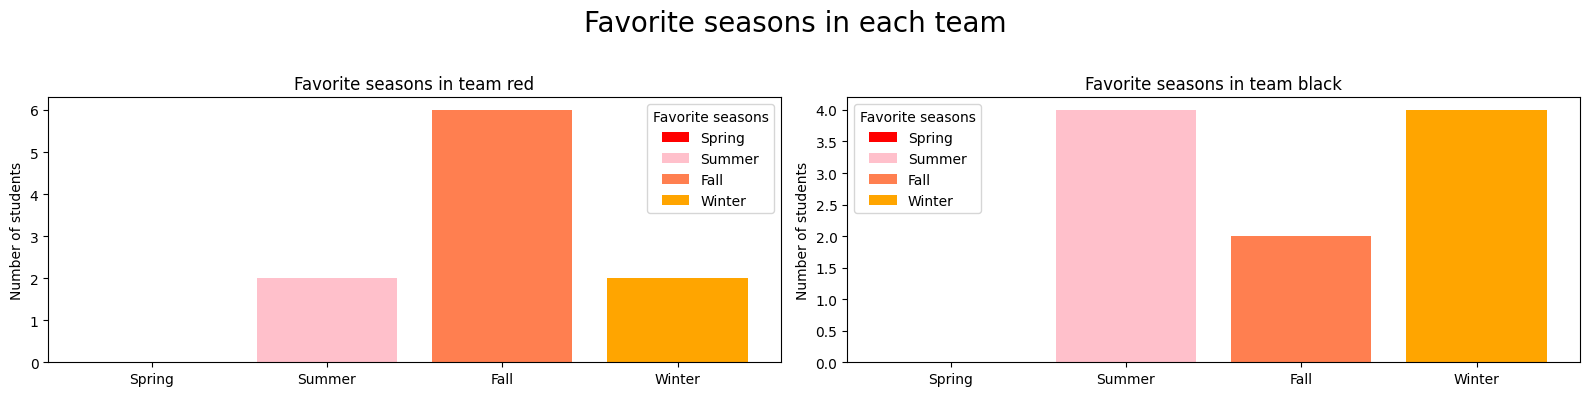

In [24]:
# Example usage
visualize_fav_season(data, card=color_list, target_col="fav_season", team_col="card_team", nrow=1, ncol=2)

- Percentage pie chart on biggest college fears

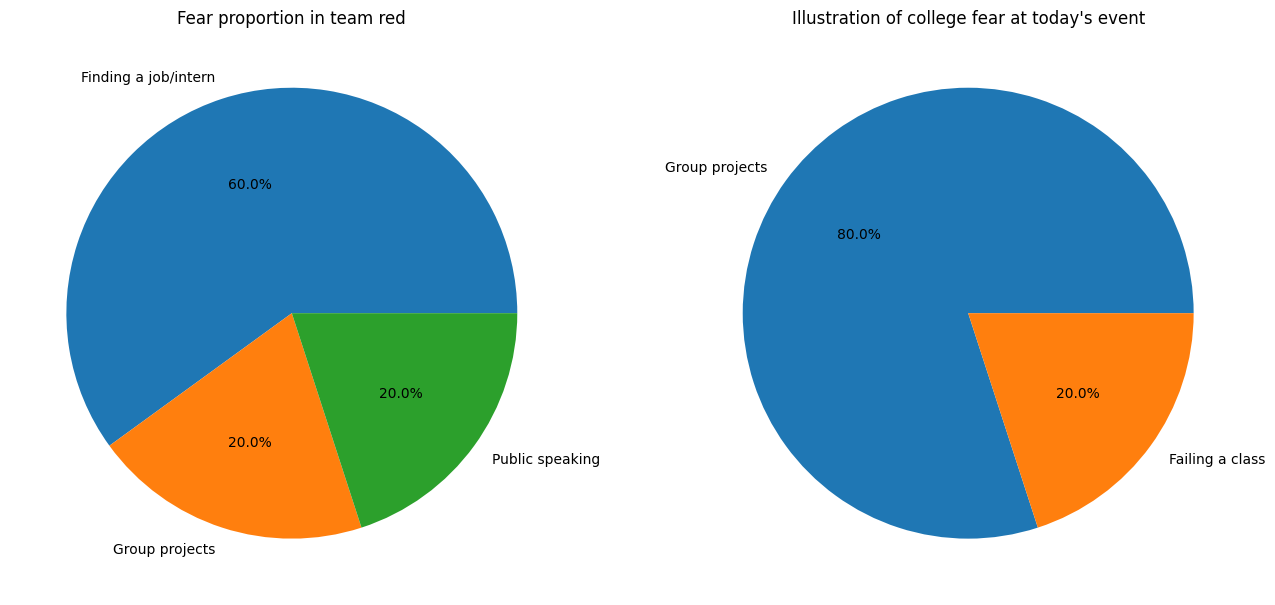

In [25]:
visualize_big_fear(data, card=color_list, target_col="big_college_fear", team_col="card_team", nrow=1, ncol=2)